In [1]:
install.packages(c("ggplot2", "dplyr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
file = "/content/mtcars1.csv"
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [4]:
# converting certain columns to categorical columns
cat_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[cat_cols] = lapply(carData[cat_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


Using a function that gives us a ideal population model

In [5]:
# Ideal population model for mpg vs. hp
model_ideal = nls(data = carData, mpg ~ (1 / hp) * a + b * hp, start = list(a = 1, b = 1))
calcmpgIdeal = function(hp){
  return(predict(model_ideal, list(hp = hp)))
}

In [6]:
# Ideal Population data and relationship between mpg and hp
hp_population = seq(min(carData$hp), max(carData$hp), by = 0.1)
mpg_population_ideal = calcmpgIdeal(hp_population)
carDataPopIdeal = data.frame(hp_population, mpg_population_ideal)
colnames(carDataPopIdeal) = c('hpPopulation', 'mpgPopulationIdeal')

# Predictor noise
noise_internal = rnorm(length(hp_population), mean = 0, sd = 0.05)

# Response noise
noise_external = rnorm(length(hp_population), mean = 0, sd = 1)

# Real (noisy) population data and relationship between mpg and hp
mpg_population_noisy = calcmpgIdeal(hp_population + noise_internal)  + noise_external
carDataPopNoisy = data.frame(hp_population, mpg_population_noisy)
colnames(carDataPopNoisy) = c('hpPopulation', 'mpgPopulationNoisy')

In [7]:
head(carDataPopNoisy,5)

,hpPopulation,mpgPopulationNoisy
,<dbl>,<dbl>
1,52.0,36.02352
2,52.1,36.44028
3,52.2,35.55750
4,52.3,35.80761
5,52.4,35.66143


Fitting a simple linear regression model for the population data

In [8]:
# lm stands for linear-model
# response/output variable is column 'mpg_population_noisy'
# predictor/input variable is column 'hp_population'
model = lm(data = carDataPopNoisy, mpg_population_noisy ~ hp_population)

  (Intercept) hp_population 
  26.28749829   -0.04258215 


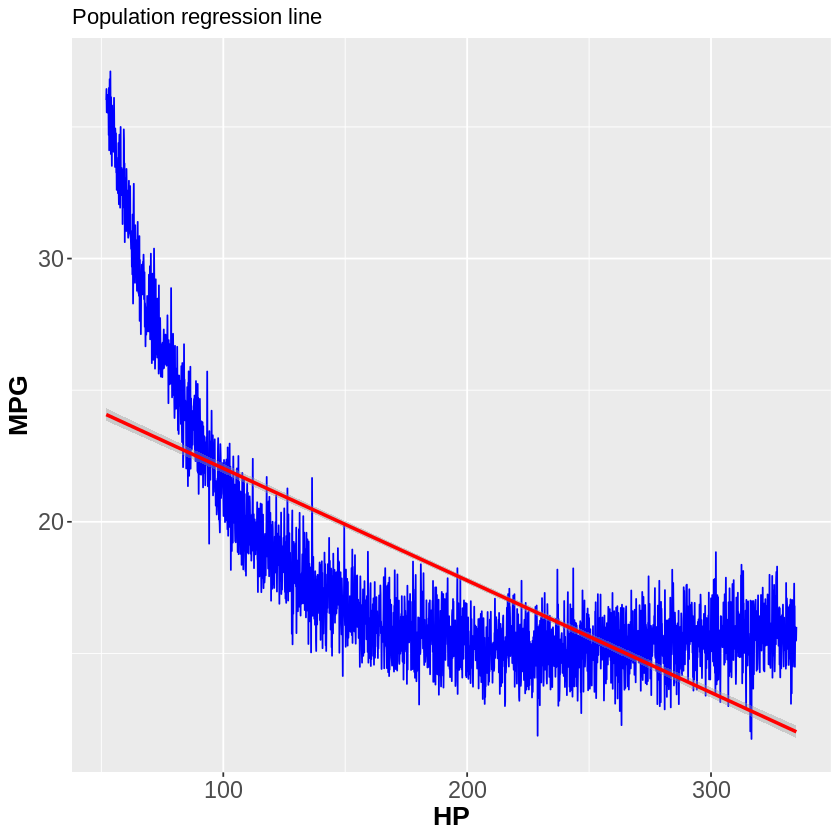

In [9]:
# Fit and draw population regression line using noisy measurements
model = lm(data = carDataPopNoisy, mpg_population_noisy ~ hp_population)
coef_population = coef(model)
print(coef_population)
ggplot(data = carDataPopNoisy, aes(x = hpPopulation, y = mpgPopulationNoisy)) +
   geom_line(color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red') +
   labs(x = 'HP', y = 'MPG') +
   ggtitle("Population regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

In [10]:
# Print summary of model
summary(model)


Call:
lm(formula = mpg_population_noisy ~ hp_population, data = carDataPopNoisy)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8009 -2.3922 -0.6587  1.8531 13.1084 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   26.2874983  0.1556224  168.92   <2e-16 ***
hp_population -0.0425822  0.0007409  -57.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.222 on 2829 degrees of freedom
Multiple R-squared:  0.5387,	Adjusted R-squared:  0.5385 
F-statistic:  3303 on 1 and 2829 DF,  p-value: < 2.2e-16


-------------
Above we can see various values.

Among them, we can see the "Coefficients" which  consist of -

- (Intercept) which corresponds to the intercept of the line where it cuts the Y-axis i.e., 26.297702 approximately.
- hp_population with value -0.04292, meaning the slope of the straight line or how inclined is the straight line.
`(Our straight line is negatively sloped in such a away that as our hp increases the mpg decreases and vice versa.)`


# Drawing a random sample from our population

In [11]:
nsamples = 32
carDataSample = carDataPopNoisy[sample(nrow(carDataPopNoisy), nsamples), ]
colnames(carDataSample) = c('hp', 'mpg')

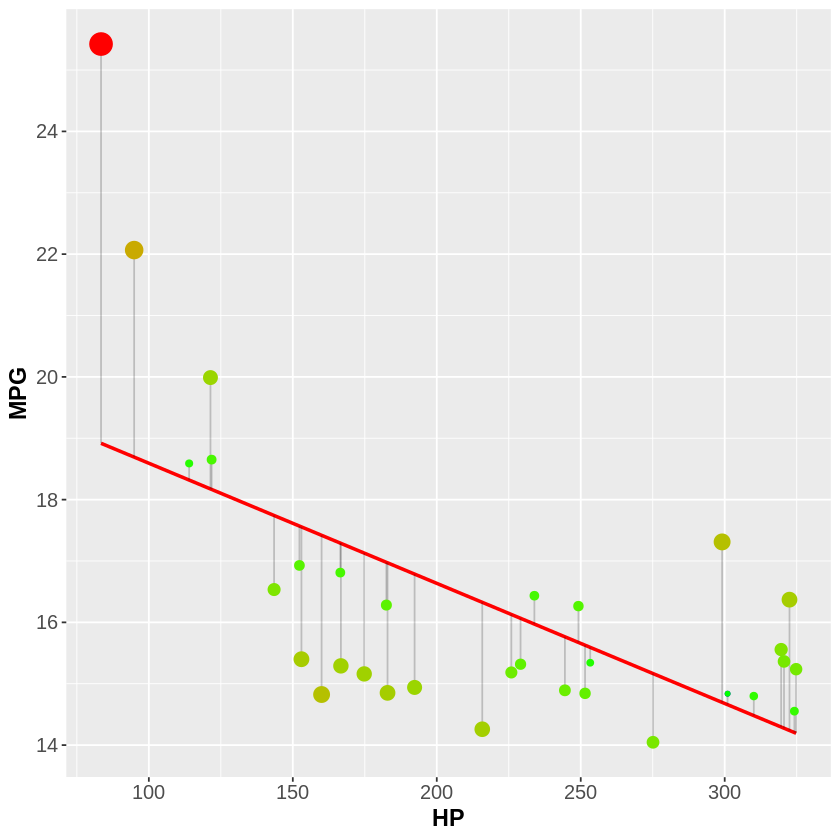

In [33]:
# Plotting actual and predicted response values clearly
# showing the residuals

#carDataSample$mpg_predicted = predict(model)
#carDataSample$residuals = residuals(model)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, se = FALSE, color = 'red') +
   geom_segment(aes(xend = hp, yend = mpg_predicted), alpha = 0.2) +
   geom_point(aes(color = abs(residuals), size = abs(residuals))) +
   scale_color_continuous(low = "green", high = "red") +
   guides(color = FALSE, size = FALSE) +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

In [13]:
head(carDataSample, 5)

,hp,mpg
,<dbl>,<dbl>
1125,164.4,17.58044
1058,157.7,16.25221
762,128.1,15.74674
2567,308.6,16.50539
617,113.6,19.60302


**Fitting a simple linear regression model for only our sample data**

In [14]:
model2 = lm(data = carDataSample, mpg ~ hp)

Warning message in geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = "green"):
“All aesthetics have length 1, but the data has 32 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


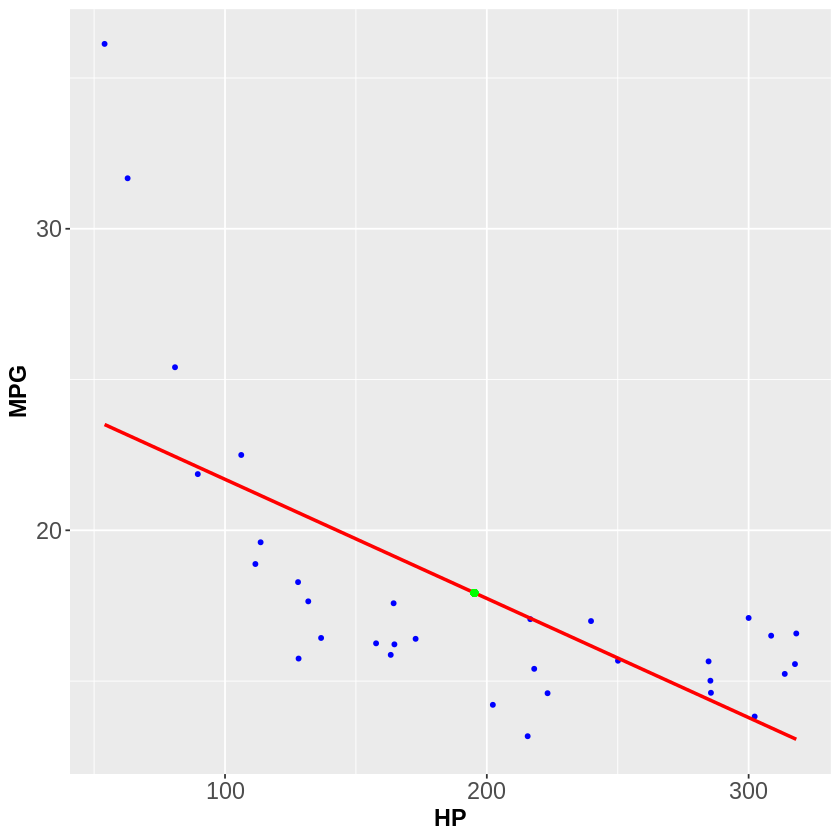

In [15]:
ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = 'green') +
   #geom_text(aes(x = mean(hp), y = mean(mpg)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

In [16]:
summary(model2)


Call:
lm(formula = mpg ~ hp, data = carDataSample)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8339 -2.5074 -0.1615  1.4436 12.6227 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.641929   1.704555   15.04 1.62e-15 ***
hp          -0.039511   0.008048   -4.91 3.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.737 on 30 degrees of freedom
Multiple R-squared:  0.4455,	Adjusted R-squared:  0.427 
F-statistic:  24.1 on 1 and 30 DF,  p-value: 3.007e-05


--------------------
Again we see that:

- (Intercept) which corresponds to the intercept of the line where it cuts the Y-axis is 24.719940 approximately.
- hp_population with value -0.039592, meaning the slope of the straight line or how inclined is the straight line.
`(Our straight line is negatively sloped in such a away that as our hp increases the mpg decreases and vice versa.)`

**Regenerating the samples and conducting the test one more time. We get:**



Warning message in geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = "green"):
“All aesthetics have length 1, but the data has 32 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”



Call:
lm(formula = mpg ~ hp, data = carDataSample)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5943 -1.1414 -0.3652  0.7054  6.5061 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.549836   1.053545   19.50  < 2e-16 ***
hp          -0.019573   0.004616   -4.24 0.000197 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.928 on 30 degrees of freedom
Multiple R-squared:  0.3747,	Adjusted R-squared:  0.3538 
F-statistic: 17.98 on 1 and 30 DF,  p-value: 0.0001968


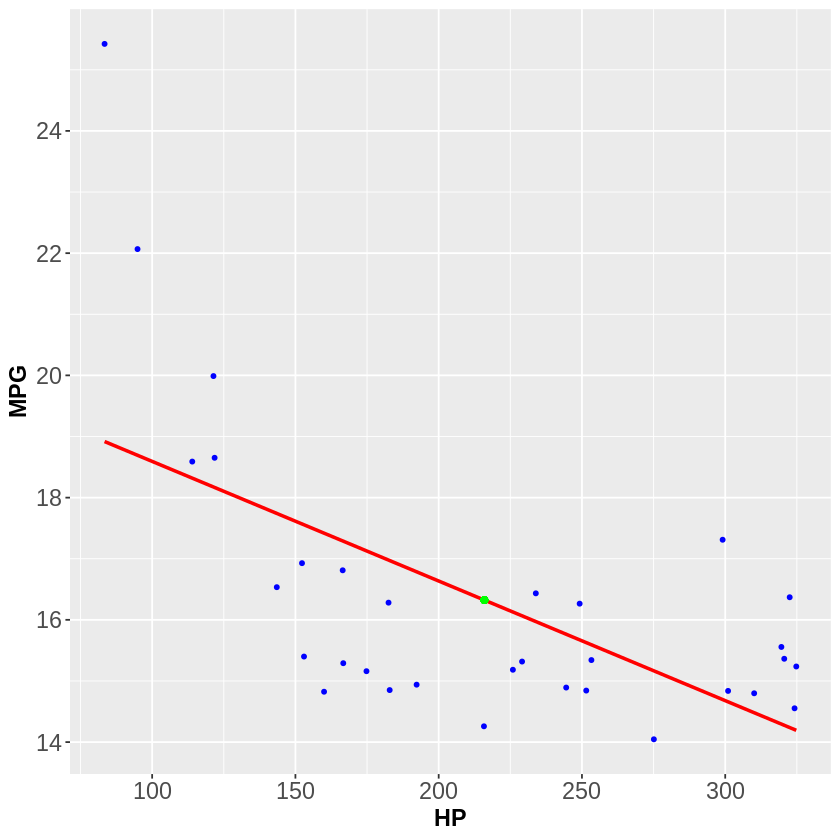

In [17]:
nsamples = 32
carDataSample = carDataPopNoisy[sample(nrow(carDataPopNoisy), nsamples), ]
colnames(carDataSample) = c('hp', 'mpg')

model2 = lm(data = carDataSample, mpg ~ hp)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   geom_point(aes(x = mean(hp), y = mean(mpg)), size = 1.5, color = 'green') +
   #geom_text(aes(x = mean(hp), y = mean(mpg)), label = 'mean sample', hjust = 0, vjust = -0.5, size = 6, color = 'green') +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 14, face = "bold"))

summary(model2)

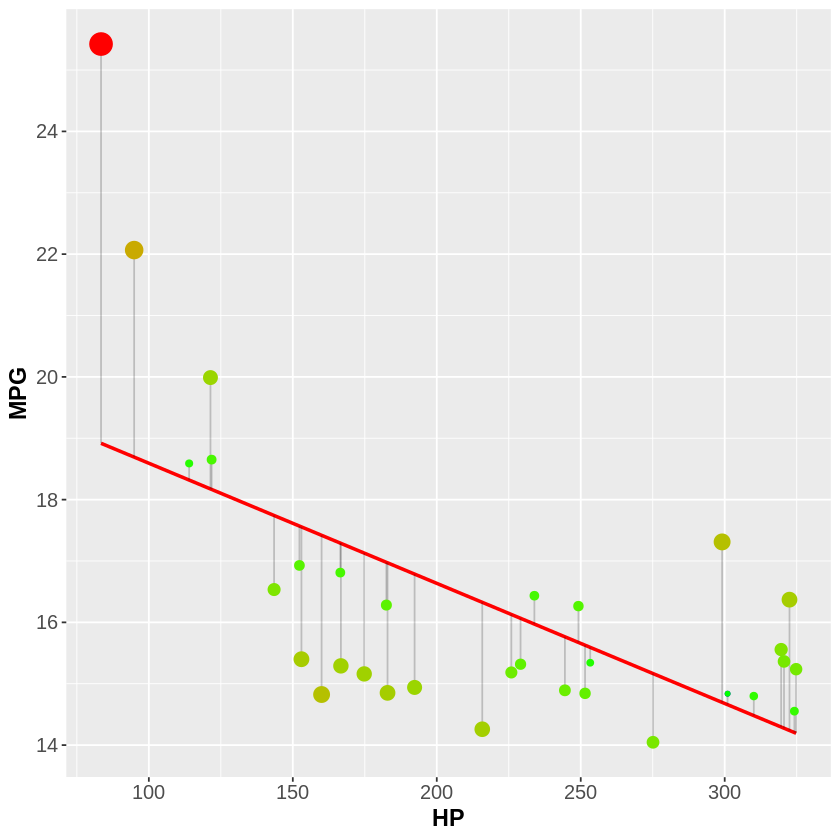

In [18]:
# Plotting actual and predicted response values clearly
# showing the residuals
carDataSample$mpg_predicted = predict(model2)
carDataSample$residuals = residuals(model2)

ggplot(data = carDataSample, aes(x = hp, y = mpg)) +
   geom_point(size = 1, color = 'blue') +
   geom_smooth(method = lm, formula = y ~ x, se = FALSE, color = 'red') +
   geom_segment(aes(xend = hp, yend = mpg_predicted), alpha = 0.2) +
   geom_point(aes(color = abs(residuals), size = abs(residuals))) +
   scale_color_continuous(low = "green", high = "red") +
   guides(color = FALSE, size = FALSE) +
   labs(x = 'HP', y = 'MPG') +
   #ggtitle("Sample regression line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 12),
   axis.text.y = element_text(size = 12),
   axis.title = element_text(size = 14, face = "bold"))

# **Ordinary Least Square Estimation**

Now, the prediction error, also referred to as **`residual`**, is:

`R = Y - Ŷ = Y - (β0 + β1X1)`

β0 = population regression line's intercept

β1 = population regression line's slope

----
Now we will compute estimates for the population parameters β0 and β1.

The ordinary least squares estimates of β0 and β1 is obtaines by minimizing the sum of squares of the residuals (`RSS`) for all samples in the datasets.

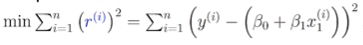

### **Interpreting OLS Estimators for a Continuous Predictor with `mpg` as the response and `hp` as the predictor**

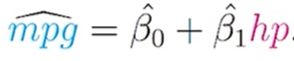

β1 is the change in the predicted `mpg` for a unit increase in `hp`.

---------
# **Test #2**
### **Interpreting OLS Estimators for a Categorical Predictor**

We will now adda new column called `heavy` with yes and no entries indicating whether a car is heavey or not.
- suppose that `mpg` is the response and that `heavy` is the predictor.

In [19]:
# Introducing a new column called heavy highlighting heavy and light cars
carData = carData %>%mutate(heavy = ifelse(scale(wt) > 0.5, 'yes', 'no'))
carData['heavy'] = lapply(carData['heavy'], as.factor)

In [20]:
head(carData %>% select(mpg,  wt, heavy), 5)

,mpg,wt,heavy
,<dbl>,<dbl>,<fct>
Mazda RX4,21.0,2.620,no
Mazda RX4 Wag,21.0,2.875,no
Datsun 710,22.8,2.320,no
Hornet 4 Drive,21.4,3.215,no
Hornet Sportabout,18.7,3.440,no


In [21]:
# getting details of the categorical column heavy
# contrasts() tells us how many levels are there in a categorical column
contrasts(carData$heavy)

,yes
no,0
yes,1


In [22]:
### Fitting a simple linear regression model for mpg as a function of heavy
model3 = lm(data = carData, mpg ~ heavy)
summary(model3)


Call:
lm(formula = mpg ~ heavy, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6167 -3.8917 -0.5167  2.5344 11.9833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.917      1.058  20.715  < 2e-16 ***
heavyyes      -7.304      2.116  -3.452  0.00168 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.183 on 30 degrees of freedom
Multiple R-squared:  0.2843,	Adjusted R-squared:  0.2604 
F-statistic: 11.92 on 1 and 30 DF,  p-value: 0.001678


Here, we can see a new variable 'heavyyes' being created. This is because we have a new dummy variable i.e., haveyyes whose coeffiecient is -7.304.

`This is beacuse No is the reference levelper alphabetical order so 'heavyyes' is equal to 0 if a car is not heavy and 1 if it is.`

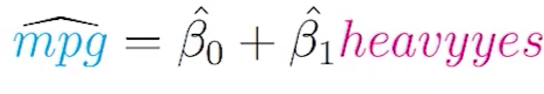


heavyyes = 0 {mpg = β0}

heavyyes = 1 {mpg = β0 + β1}

In [23]:
### further testing
# Average mpg of the not heavy cars
# First. we go to the heavy column and check where its no
# secong we index into the carData and get the values in the column 'mpg'
mean(carData[carData$heavy == 'no', 'mpg'])

[1] 21.91667

In [24]:
# Average mpg of the heavy cars minus the average mpg of the not heavy cars
# We get the difference between the heacy cars and our refernce level i.e., not heavy cars
mean(carData[carData$heavy == 'yes', 'mpg'])- mean(carData[carData$heavy == 'no', 'mpg'])

[1] -7.304167

# Properties of OLS estimators

## **Property #1**
- B̂0 and B̂1 are `unbiased estimators` of B̂0 and B̂1, respectively

(E[B̂0] = B0 and E[B̂1] = B1)

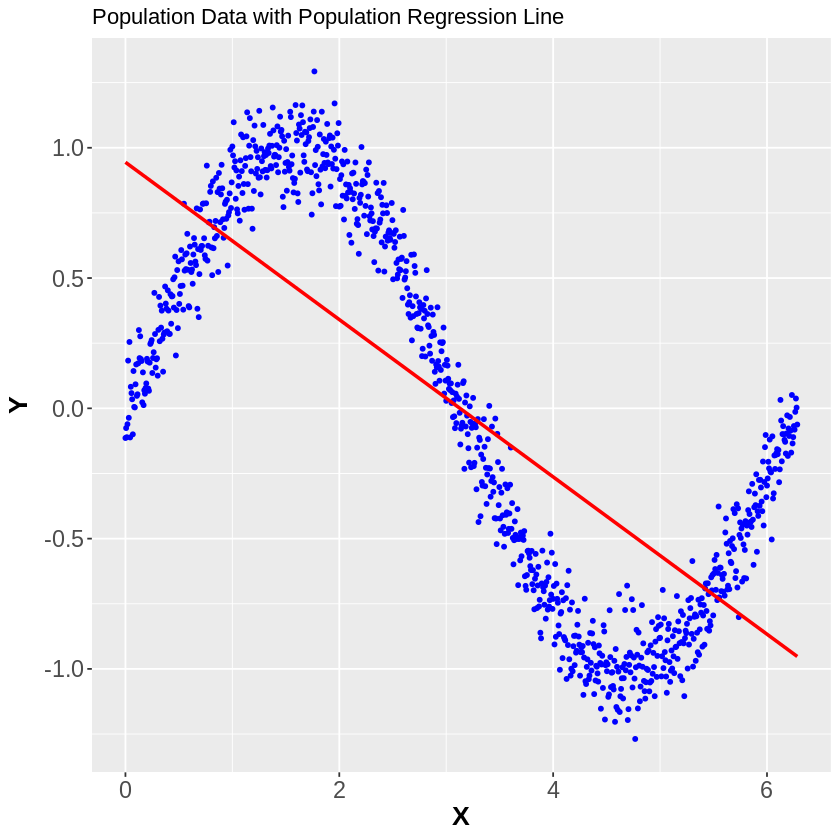

In [25]:
# Noisy sin function as a population model
nsamples = 1000
x = seq(0, 2*pi, length = nsamples)
y = sin(x) + rnorm(length(x), mean = 0, sd = 0.1)
popData = data.frame(x, y)
colnames(popData) = c('X', 'Y')

ggplot(data = popData, aes(x = X, y = Y)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'X', y = 'Y') +
   ggtitle("Population Data with Population Regression Line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

In [26]:
# Simple linear regression model and coefficient estimates
model = lm(data = popData, Y~X)
summary(model)
beta0 = summary(model)$coefficients["(Intercept)", "Estimate"]
beta1= summary(model)$coefficients["X", "Estimate"]
print(beta0)
print(beta1)


Call:
lm(formula = Y ~ X, data = popData)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05821 -0.40068  0.01063  0.41505  0.98832 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.944305   0.029199   32.34   <2e-16 ***
X           -0.301861   0.008047  -37.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.462 on 998 degrees of freedom
Multiple R-squared:  0.5851,	Adjusted R-squared:  0.5846 
F-statistic:  1407 on 1 and 998 DF,  p-value: < 2.2e-16


[1] 0.9443048
[1] -0.3018609


In [27]:
# Fit SLRM using multiple datasets
ndatasets = 1000
nsamples = 200
beta_0_hat = numeric(ndatasets)
beta_1_hat = numeric(ndatasets)
for (j in seq(1, ndatasets)) {
  idx = sample(nrow(popData), nsamples)
  model = lm(data = popData[idx,], Y~X)
  beta_0_hat[j] = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat[j] = summary(model)$coefficients["X", "Estimate"]
}
beta_0_hat_avg = mean(beta_0_hat)
beta_1_hat_avg = mean(beta_1_hat)
print(beta_0_hat_avg)
print(beta0)
print(beta_1_hat_avg)
print(beta1)

[1] 0.9460257
[1] 0.9443048
[1] -0.3025695
[1] -0.3018609


Here we can see that on an average our LRM works as our avaerage of B̂0 is close to B0 and B̂1 to B1.

Hence, we can say that an unbiased estimator simply means that if we are to realize that estimator (in this case B̂0) a large number of times, theoritically infinitley many times,

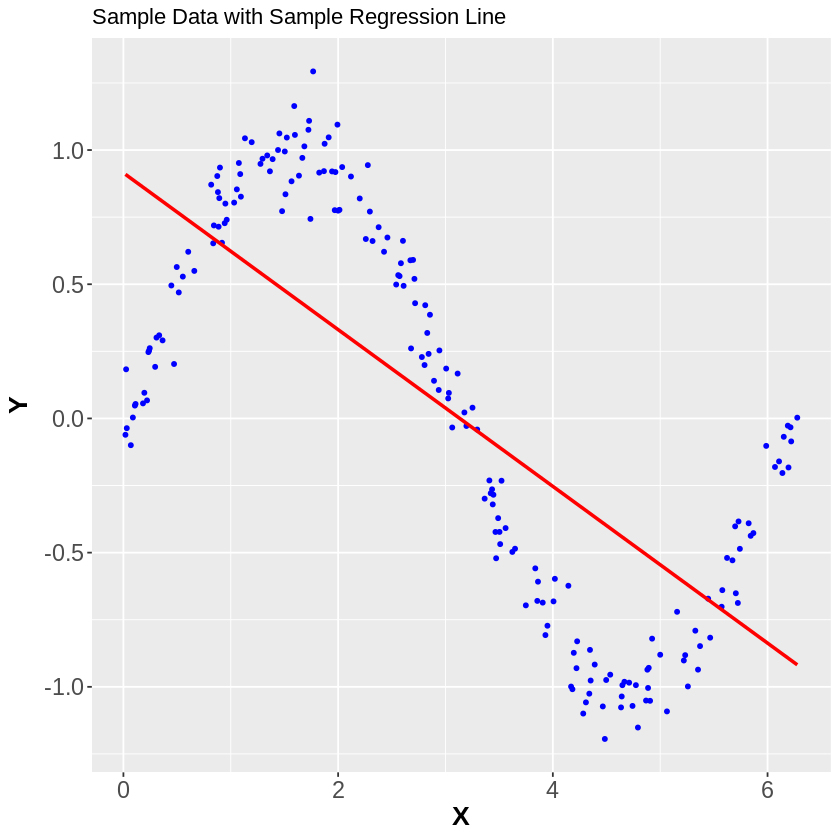

In [34]:
# Plot dataset with sample regression line
ggplot(data = popData[idx, ], aes(x = X, y = Y)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'X', y = 'Y') +
   ggtitle("Sample Data with Sample Regression Line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

Let's use a smple of size 2

In [35]:
# Fit SLRM using multiple datasets
ndatasets = 1000
nsamples = 2
beta_0_hat = numeric(ndatasets)
beta_1_hat = numeric(ndatasets)
for (j in seq(1, ndatasets)) {
  idx = sample(nrow(popData), nsamples)
  model = lm(data = popData[idx,], Y~X)
  beta_0_hat[j] = summary(model)$coefficients["(Intercept)", "Estimate"]
  beta_1_hat[j] = summary(model)$coefficients["X", "Estimate"]
}
beta_0_hat_avg = mean(beta_0_hat)
beta_1_hat_avg = mean(beta_1_hat)
print(beta_0_hat_avg)
print(beta0)
print(beta_1_hat_avg)
print(beta1)

[1] 0.6782668
[1] 0.9443048
[1] -0.2503281
[1] -0.3018609


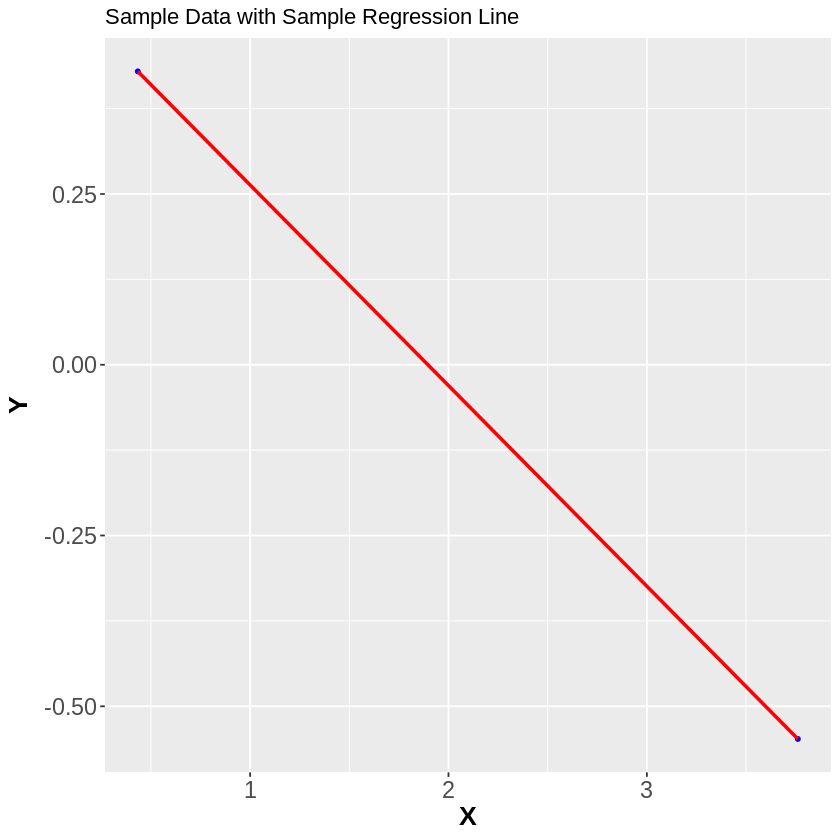

In [36]:
# Plot dataset with sample regression line
ggplot(data = popData[idx, ], aes(x = X, y = Y)) +
  geom_point(size = 1, color = 'blue') +
  geom_smooth(method = lm, formula = y ~ x, color = 'red', se = FALSE) +
   labs(x = 'X', y = 'Y') +
   ggtitle("Sample Data with Sample Regression Line") +
   theme(axis.text = element_text(size = 12),
   axis.text.x = element_text(size = 14),
   axis.text.y = element_text(size = 14),
   axis.title = element_text(size = 16, face = "bold"))

Here, we can conclude that the size of the dataset should be resonable to capture the essence of the population.

## **Property #2**
In the linear approximation Y(i) = B0 + B1X1(i) +` E(i) `
- The assumptions about the random error term E(i) / Epsilon : `zero mean`, constant variance = `sigma square`, and `uncorrelated across the samples`.

(The covariance of the correlation between the two random variables is equal to 0. The error associated with one sample has no influence on the other random error associated with another sample.)

- Variance of B̂0 and B̂1